In [26]:
from yahoo_fin.stock_info import get_data
amzn = amazon_weekly= get_data("amzn", start_date="12/04/2009", end_date="12/04/2019", index_as_date = True, interval="1wk")

In [28]:
type(amzn)

pandas.core.frame.DataFrame

In [29]:
import yfinance as yf

amzn2 = yf.Ticker("AMZN")

# get stock info
amzn2.info

# get historical market data
hist = amzn2.history(period="max")


In [35]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000,0,0.0
1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000,0,0.0
1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800,0,0.0
1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200,0,0.0
1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200,0,0.0


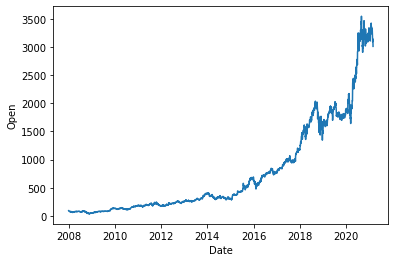

In [46]:
# example plotting
sns.lineplot(data=hist.loc['2008-1-1':], x='Date', y='Open');

In [4]:
# Imports
from pandas_datareader import data as pdr
from yahoo_fin import stock_info as si
from pandas import ExcelWriter
import yfinance as yf
import pandas as pd
import datetime
import time
import seaborn as sns
yf.pdr_override()

In [49]:
# Variables
tickers = si.tickers_sp500()

/Users/roblisy/.pyenv/versions/3.8.0/envs/geoff_pandas/lib/python3.8/site-packages/yahoo_fin/stock_info.py:130: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500["Symbol"] = sp500["Symbol"].str.replace(".", "-")


In [52]:
tickers2 = tickers[1:10]

In [53]:
tickers2

['AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE']

In [8]:
tickers = [item.replace(".", "-") for item in tickers] # Yahoo Finance uses dashes instead of dots
index_name = '^GSPC' # S&P 500
start_date = datetime.datetime.now() - datetime.timedelta(days=365)
end_date = datetime.date.today()
exportList = pd.DataFrame(columns=['Stock', "RS_Rating", "50 Day MA", "150 Day Ma", "200 Day MA", "52 Week Low", "52 week High"])
returns_multiples = []

In [9]:
# Index Returns
index_df = pdr.get_data_yahoo(index_name, start_date, end_date)
index_df['Percent Change'] = index_df['Adj Close'].pct_change()
index_return = (index_df['Percent Change'] + 1).cumprod()[-1]

[*********************100%***********************]  1 of 1 completed


In [22]:
# Find top 30% performing stocks (relative to the S&P 500)
for ticker in tickers:
    # Download historical data as CSV for each stock (makes the process faster)
    df = pdr.get_data_yahoo(ticker, start_date, end_date)
    df.to_csv(f'{ticker}.csv')

    # Calculating returns relative to the market (returns multiple)
    df['Percent Change'] = df['Adj Close'].pct_change()
    stock_return = (df['Percent Change'] + 1).cumprod()[-1]
    
    returns_multiple = round((stock_return / index_return), 2)
    returns_multiples.extend([returns_multiple])
    
    #print (f'Ticker: {ticker}; Returns Multiple against S&P 500: {returns_multiple}\n')
    time.sleep(1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

KeyboardInterrupt: 

In [47]:
# Creating dataframe of only top 30%
rs_df = pd.DataFrame(list(zip(tickers, returns_multiples)), columns=['Ticker', 'Returns_multiple'])
rs_df['RS_Rating'] = rs_df.Returns_multiple.rank(pct=True) * 100
rs_df = rs_df[rs_df.RS_Rating >= rs_df.RS_Rating.quantile(.70)]

In [48]:
rs_df

,Ticker,Returns_multiple,RS_Rating
0,A,1.17,71.341463
3,AAPL,1.33,90.853659
6,ABMD,1.63,98.170732
7,ABT,1.21,76.219512
10,ADI,1.17,71.341463
13,ADSK,1.33,90.853659
16,AES,1.63,98.170732
17,AFL,1.21,76.219512
21,AKAM,1.23,80.487805
26,ALLE,1.28,85.975610


In [24]:
# Checking Minervini conditions of top 30% of stocks in given list
rs_stocks = rs_df['Ticker']
for stock in rs_stocks:    
    try:
        df = pd.read_csv(f'{stock}.csv', index_col=0)
        sma = [50, 150, 200]
        for x in sma:
            df["SMA_"+str(x)] = round(df['Adj Close'].rolling(window=x).mean(), 2)
        
        # Storing required values
        currentClose = df["Adj Close"][-1]
        moving_average_50 = df["SMA_50"][-1]
        moving_average_150 = df["SMA_150"][-1]
        moving_average_200 = df["SMA_200"][-1]
        low_of_52week = round(min(df["Low"][-260:]), 2)
        high_of_52week = round(max(df["High"][-260:]), 2)
        RS_Rating = round(rs_df[rs_df['Ticker']==stock].RS_Rating.tolist()[0])
        
        try:
            moving_average_200_20 = df["SMA_200"][-20]
        except Exception:
            moving_average_200_20 = 0

        # Condition 1: Current Price > 150 SMA and > 200 SMA
        condition_1 = currentClose > moving_average_150 > moving_average_200
        
        # Condition 2: 150 SMA and > 200 SMA
        condition_2 = moving_average_150 > moving_average_200

        # Condition 3: 200 SMA trending up for at least 1 month
        condition_3 = moving_average_200 > moving_average_200_20
        
        # Condition 4: 50 SMA> 150 SMA and 50 SMA> 200 SMA
        condition_4 = moving_average_50 > moving_average_150 > moving_average_200
           
        # Condition 5: Current Price > 50 SMA
        condition_5 = currentClose > moving_average_50
           
        # Condition 6: Current Price is at least 30% above 52 week low
        condition_6 = currentClose >= (1.3*low_of_52week)
           
        # Condition 7: Current Price is within 25% of 52 week high
        condition_7 = currentClose >= (.75*high_of_52week)
        
        # If all conditions above are true, add stock to exportList
        if(condition_1 and condition_2 and condition_3 and condition_4 and condition_5 and condition_6 and condition_7):
            exportList = exportList.append({'Stock': stock, "RS_Rating": RS_Rating ,
                                            "50 Day MA": moving_average_50, 
                                            "150 Day Ma": moving_average_150,
                                            "200 Day MA": moving_average_200, 
                                            "52 Week Low": low_of_52week, 
                                            "52 week High": high_of_52week}, 
                                           ignore_index=True)
            print (stock + " made the Minervini requirements")
    except Exception as e:
        print (e)
        print(f"Could not gather data on {stock}")

exportList = exportList.sort_values(by='RS_Rating', ascending=False)
print('\n', exportList)
writer = ExcelWriter("ScreenOutput.xlsx")
exportList.to_excel(writer, "Sheet1")
writer.save()

ABT made the Minervini requirements
AES made the Minervini requirements
AFL made the Minervini requirements
AMP made the Minervini requirements
ANTM made the Minervini requirements
AOS made the Minervini requirements
AVY made the Minervini requirements
BA made the Minervini requirements
BEN made the Minervini requirements
[Errno 2] No such file or directory: 'BWA.csv'
Could not gather data on BWA
[Errno 2] No such file or directory: 'CAG.csv'
Could not gather data on CAG
[Errno 2] No such file or directory: 'CAH.csv'
Could not gather data on CAH

    Stock RS_Rating  50 Day MA  150 Day Ma  200 Day MA  52 Week Low  \
0    AMP       100     206.68      179.40      170.94        80.01   
12   AMP       100     206.68      179.40      170.94        80.01   
1    AES        98      25.82       21.19       19.29         8.11   
10   AES        98      25.82       21.19       19.29         8.11   
2   ANTM        96     308.91      295.87      289.34       171.03   
13  ANTM        96     308